In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
for column in df_train.columns:
    if df_train[column].dtype == 'object':
        df_train[column].fillna(df_train[column].mode()[0], inplace=True)
        if column in df_test.columns:
            df_test[column].fillna(df_test[column].mode()[0], inplace=True)
        else:
            df_train[column].fillna(df_train[column].mean(), inplace=True)
            if column in df_test.columns:
                df_test[column].fillna(df_test[column].mean(), inplace=True)

In [5]:
# Feature selection
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']
x = df_train[features]
y = df_train['SalePrice']

In [6]:
# Split the data
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
# Model Training
lin_model = LinearRegression()
lin_model.fit(x_train, y_train)

LinearRegression()

In [9]:
y_pred = lin_model.predict(x_val)
MAE = mean_absolute_error(y_val, y_pred)
MSE = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

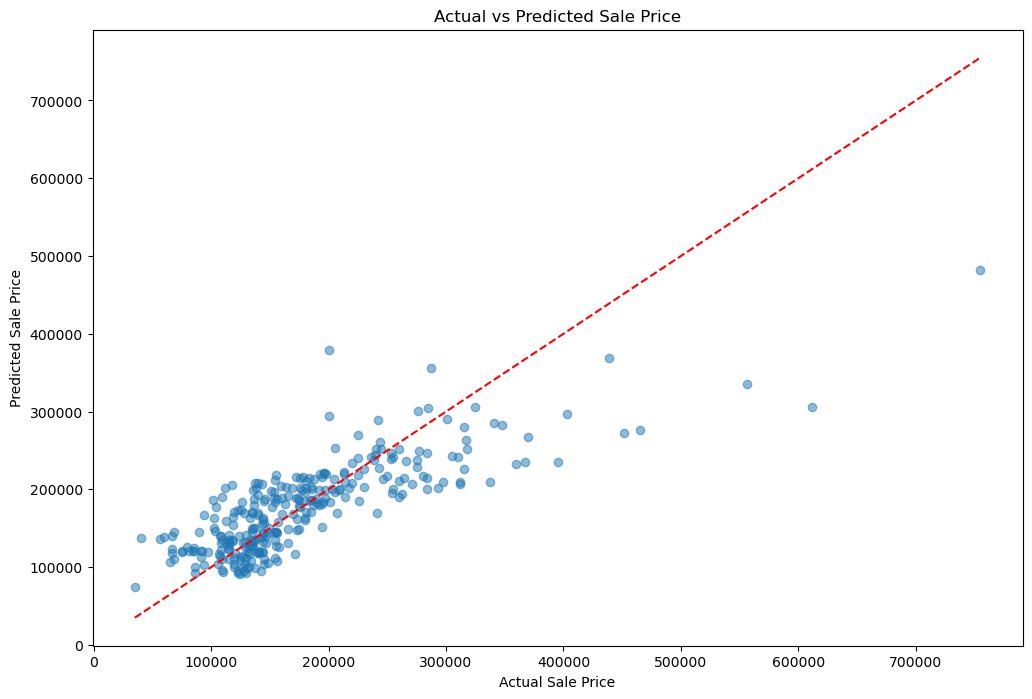

In [10]:
plt.figure(figsize=(12,8))
plt.scatter(y_val, y_pred, alpha=0.5)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Price')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()

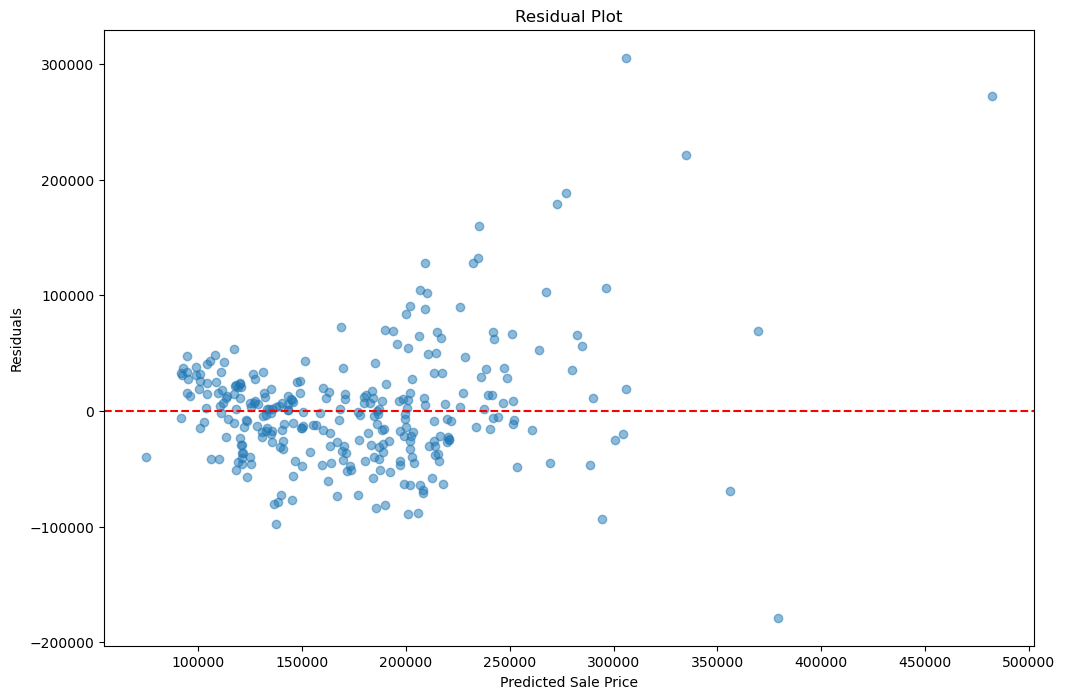

In [11]:
residuals = y_val - y_pred
plt.figure(figsize=(12,8))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [13]:
import seaborn as sns

C:\Users\91844\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


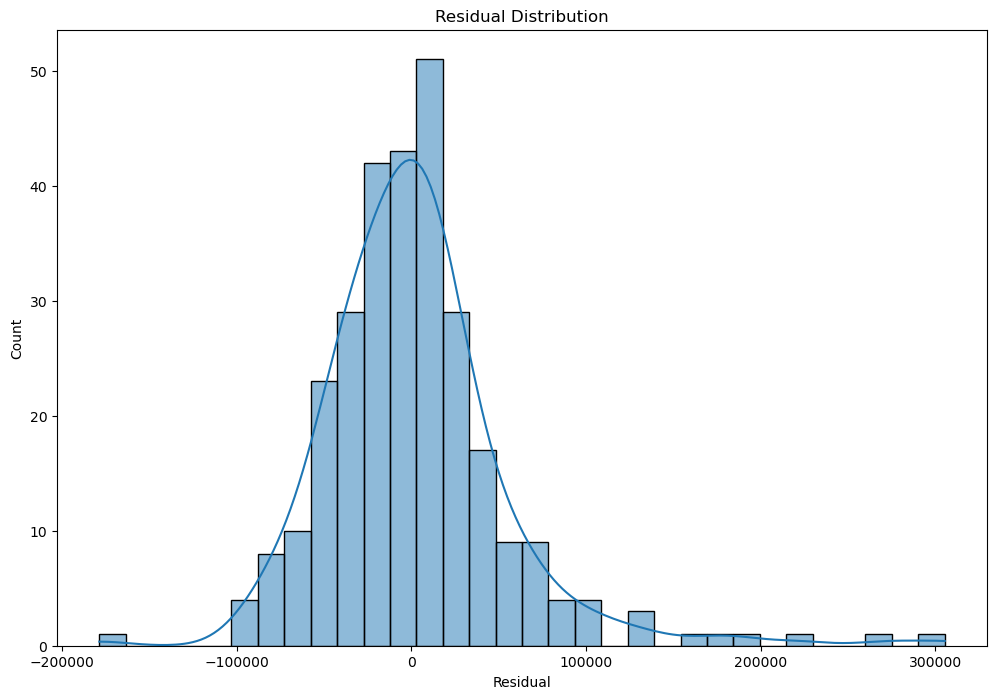

In [14]:
plt.figure(figsize=(12,8))
sns.histplot(residuals, kde=True)
plt.xlabel('Residual')
plt.title('Residual Distribution')
plt.show()

C:\Users\91844\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91844\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91844\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91844\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

<Figure size 1200x800 with 0 Axes>

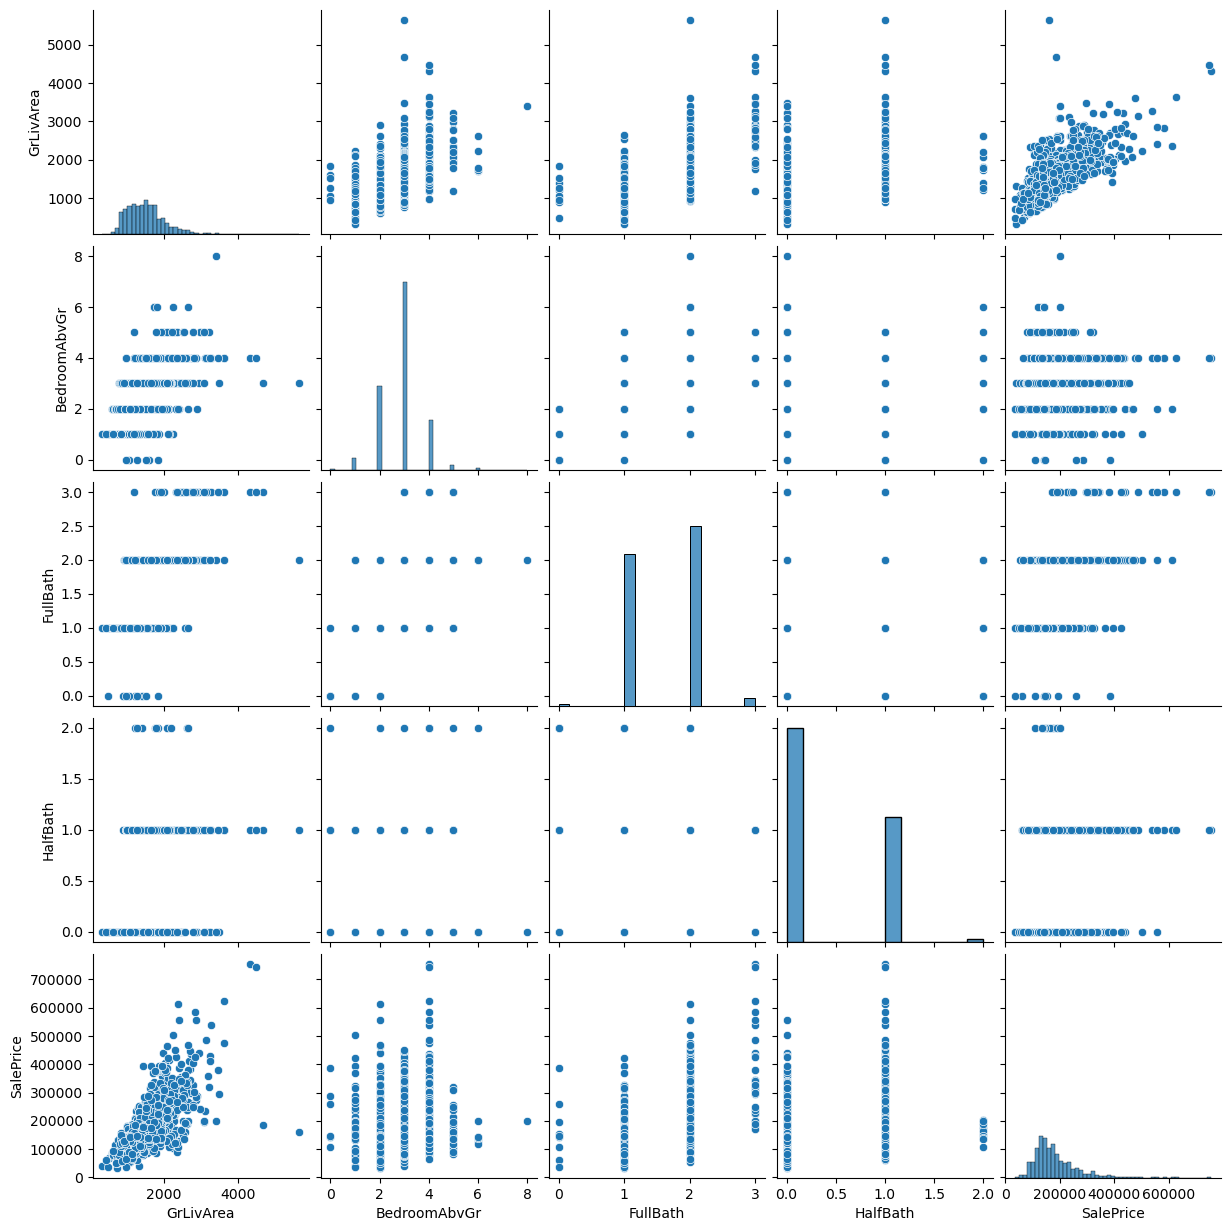

In [15]:
plt.figure(figsize=(12,8))
sns.pairplot(df_train[features + ['SalePrice']])
plt.show()

In [17]:
eg = pd.DataFrame({
    'GrLivArea':[2000],
    'BedroomAbvGr':[3],
    'FullBath':[2],
    'HalfBath':[1],
})
eg_pred = lin_model.predict(eg)
print(f'Example Prediction - ${eg_pred[0]:,.2f}')

x_test = df_test[features]
test_pred = lin_model.predict(x_test)

Example Prediction - $242,491.45
